# Lab 6.02 - Regression analysis

In [20]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

Source: Departement Landbouw en Visserij op basis van StatBel

In [103]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";")
# Show the first few records of the Data Frame
df.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   year                        41 non-null     int64 
 1   number_of_farms             41 non-null     int64 
 2   average_area_per_farm_(ha)  41 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


3. Change the datatype of 'average_area_per_farm_(ha)' to float.

In [104]:
df['average_area_per_farm_(ha)'] = df['average_area_per_farm_(ha)'].str.replace(',', '.').astype('float')
df.tail()


,year,number_of_farms,average_area_per_farm_(ha)
36,2016,23981,25.87
37,2017,23225,26.31
38,2018,23361,26.50
39,2019,23318,26.66
40,2020,23225,26.90


4. Draw a scatter plot of the number of farms versus the year.


<Axes: xlabel='year', ylabel='number_of_farms'>

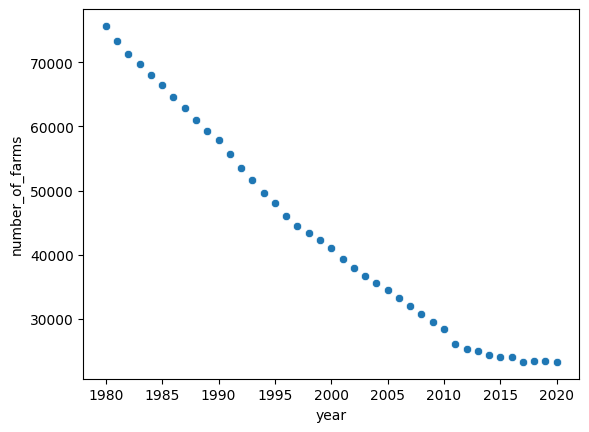

In [105]:
sns.scatterplot(data=df, x='year', y='number_of_farms')

5. Is there a positive / negative relationship between year and number_of_farms?

R = -0.9861066349492859

In [72]:
# Correlation calculated from covariance
covar = np.cov(df['year'], df['number_of_farms'], ddof=1)[0][1] 

stdx = df['year'].std()
stdy = df['number_of_farms'].std()

R1 = covar / (stdx * stdy)
print(f"R ≈ {covar:.3f} / ( {stdx:.3f} * {stdy:.3f} ) ≈ {R1:.3f}")

# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(df['year'],df['number_of_farms'])[0][1]
print(f"R ≈ {cor:.3f}")


R ≈ -198697.350 / ( 11.979 * 16820.629 ) ≈ -0.986
R ≈ -0.986


6. Is there a strong relationship between year and 'number_of_farms'?

R² = 0.9724062954910041

In [71]:
print(R1 ** 2)
  

0.9724062954910039


- R < 0 => Het is een dalend verband
- R² ≈ 0.97 => Het is een uitzonderlijk sterk verband 
- R² ≈ 0.97 => 97% van de variantie in de afhankelijk veranderelijke wordt verklaard door de onafhankelijke veranderlijke


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

<Axes: xlabel='year', ylabel='average_area_per_farm_(ha)'>

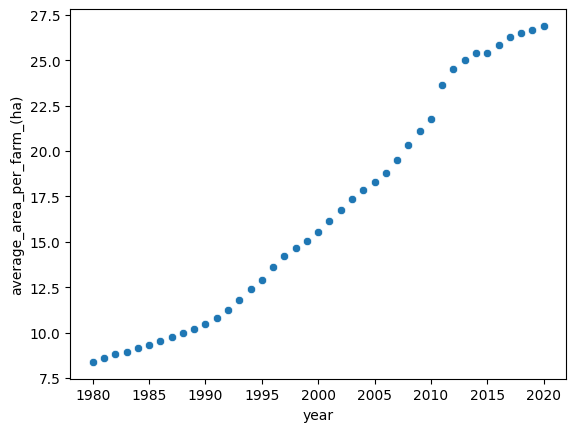

In [73]:
sns.scatterplot(data=df, x='year', y='average_area_per_farm_(ha)')

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [84]:
a, b = np.polyfit(df['year'], df['average_area_per_farm_(ha)'], 1)

print(a * 2035 + b)


34.919878048780674


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

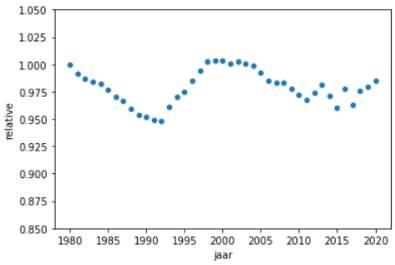


634416.28


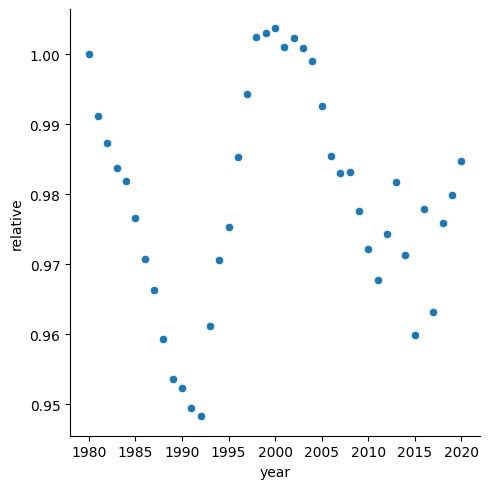

In [114]:
df['total'] = df['average_area_per_farm_(ha)'] * df['number_of_farms']
rel = df.query('year == 1980')['total'].max()
print(rel)
df['relative'] = df['total'] / rel 

sns.relplot(x=df['year'], y=df['relative'], kind='scatter')